In [40]:
# packages
import pandas as pd

In [41]:
netflix_data = pd.read_csv("dataset/netflix_dataset.csv", index_col=0)
netflix_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


Exploring the data

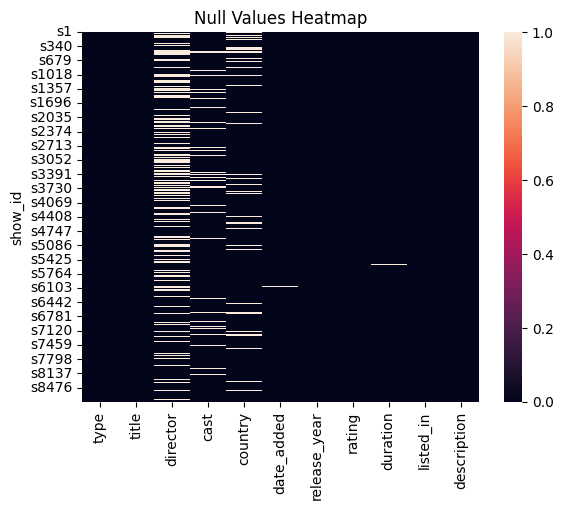

In [42]:
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

sns.heatmap(netflix_data.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [4]:
# find out the data types in your data
netflix_data.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# find out the columns of your dataset
netflix_data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# describe mean,min,max,25%, 50%, 75% etc
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# Finding the number of NULL values in @ column
# finding if you have any missing values
netflix_data.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Data cleaning
-----
1. Duration
----

In [8]:
# find the number of non unique values 
netflix_data['director'].nunique()

4528

In [9]:
# Find rows with missing 'duration'
null_rows_duration = netflix_data[netflix_data['duration'].isnull()]

# Define a custom function to swap 'duration' and 'rating'
def swap_duration_rating(row):
    if pd.isna(row['duration']):
        row['duration'], row['rating'] = row['rating'], row['duration']
    return row

# Apply the custom function to swap the values
null_rows_duration = null_rows_duration.apply(swap_duration_rating, axis=1)

# Add the swapped data back to the main DataFrame 'netflix_data'
netflix_data = netflix_data.combine_first(null_rows_duration)

# Now, the values should be swapped
# print(null_rows_duration)

In [10]:
netflix_data.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

2. Cleaning Rating Column
-----

In [11]:
# find unique values for rating 
list_rating = netflix_data['rating'].unique()
list_rating

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y', 'TV-Y7', 'R', 'PG', 'TV-PG',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
# Count the values in the 
netflix_data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [13]:
# Null values in rating
netflix_data.loc[netflix_data['rating'].isnull()]


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [14]:
# Find the row with the title "My Honor Was Loyalty" and set its "rating" to "PG-13"
netflix_data.loc[netflix_data['title'] == 'My Honor Was Loyalty', 'rating'] = 'PG-13'
netflix_data.loc[netflix_data['title'] == 'Little Lunch', 'rating'] = 'TV-MA'
netflix_data.loc[netflix_data['title'] == 'Gargantia on the Verdurous Planet', 'rating'] = 'TV-14'
netflix_data.loc[netflix_data['cast'] == 'Oprah Winfrey, Ava DuVernay', 'rating'] = 'PG'


In [15]:
netflix_data.loc[netflix_data['rating'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [37]:
# filtering rating with values 74 84 66 min 
netflix_data.loc[netflix_data['rating'].isin(['74 min', '84 min', '66 min'])]

# replacing values in rating 
netflix_data.loc[netflix_data['title'] == 'Louis C.K.: Live at the Comedy Store', 'rating'] = 'TV-MA'
netflix_data.loc[netflix_data['title'] == 'Louis C.K.: Hilarious', 'rating'] = 'TV-MA'
netflix_data.loc[netflix_data['title'] == 'Louis C.K. 2017', 'rating'] = 'TV-MA'

In [38]:
# check if column rating is sorted 
# netflix_data['rating'].unique()

# check the count of the values in the column rating
netflix_data['rating'].value_counts()

rating
TV-MA       3211
TV-14       2161
TV-PG        862
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           289
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

3. Cleaning Date Added
----

In [18]:
# netflix_data['date_added'].unique()
# netflix_data['date_added'].value_counts().sort_values(ascending=False)
netflix_data.loc[netflix_data['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [19]:
# Replacing NAN values in 'date_added' to January 1, 2020
netflix_data["date_added"].fillna("January 1, 2020", inplace = True)

In [20]:
netflix_data.loc[netflix_data['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


4. Cleaning country
----

In [21]:
netflix_data.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
# netflix_data['country'].unique()
netflix_data['country'].value_counts().sort_values(ascending=False)
# netflix_data.loc[netflix_data['country'].isnull()]

country
United States                                 2818
India                                          972
United Kingdom                                 419
Japan                                          245
South Korea                                    199
                                              ... 
Russia, Spain                                    1
Egypt, Austria, United States                    1
France, Netherlands, South Africa, Finland       1
United States, East Germany, West Germany        1
United States, United Kingdom, New Zealand       1
Name: count, Length: 748, dtype: int64

In [23]:
# country col fill NAN with unknown 
netflix_data['country'].fillna("Unknown", inplace=True)

# check for null values
netflix_data.loc[netflix_data['country'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [35]:
#this code filters data based on the country 'United States' and the output is saved in a csv file 
output_filename = 'us_country_count.csv'

#
us_data = netflix_data[netflix_data['country'].str.contains('United States')]
# count_us = us_data['country'].value_counts()
count_us = us_data['country'].value_counts().reset_index()
count_us.columns = ['Country', 'Count']

count_us.to_csv(output_filename, index=False)

print(count_us)

                                        Country  Count
0                                 United States   2818
1                 United Kingdom, United States     75
2                         United States, Canada     73
3                 United States, United Kingdom     47
4                         Canada, United States     45
..                                          ...    ...
354      Canada, Germany, France, United States      1
355      United Kingdom, Ireland, United States      1
356       United Kingdom, Russia, United States      1
357                Austria, Iraq, United States      1
358  United States, United Kingdom, New Zealand      1

[359 rows x 2 columns]


In [25]:
# Filtering the df(netflix_data) on data containing 'United States'
netflix_data[netflix_data['country'].str.contains('United States')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s100,TV Show,On the Verge,NaN,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States","September 7, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ..."
s1000,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States","April 22, 2021",2021,TV-MA,116 min,"Dramas, International Movies, Thrillers",A three-person crew on a mission to Mars faces...
s1002,Movie,Oloibiri,Curtis Graham,"Olu Jacobs, Richard Mofe-Damijo, William R. Mo...","Canada, Nigeria, United States","April 21, 2021",2015,TV-14,86 min,"Dramas, International Movies, Thrillers","After drilling depletes a small village, a cor..."
...,...,...,...,...,...,...,...,...,...,...,...
s970,Movie,August: Osage County,John Wells,"Meryl Streep, Julia Roberts, Chris Cooper, Ewa...",United States,"April 27, 2021",2014,R,121 min,Dramas,"When their father disappears, three strong-wil..."
s971,Movie,Battle: Los Angeles,Jonathan Liebesman,"Aaron Eckhart, Michelle Rodriguez, Ramon Rodri...",United States,"April 27, 2021",2011,PG-13,116 min,"Action & Adventure, Sci-Fi & Fantasy","Led by their skillful staff sergeant, a platoo..."
s976,Movie,Shadow and Bone - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster, ...",United States,"April 24, 2021",2021,TV-14,33 min,"Action & Adventure, Comedies, Dramas","Stars of Netflix's ""Shadow and Bone"" discuss t..."


5. Cleaning up Cast
----

In [26]:
netflix_data.isna().sum()

type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [27]:
# checking for null values
netflix_data.loc[netflix_data['cast'].isnull()]
# netflix_data['cast'].sample(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s1006,Movie,Keymon and Nani in Space Adventure,NaN,NaN,Unknown,"April 20, 2021",2013,TV-Y,76 min,"Children & Family Movies, Comedies","For Rohan and his magical pal, Keymon, a trip ..."
s1012,Movie,Free to Play,NaN,NaN,United States,"April 19, 2021",2014,TV-14,76 min,Documentaries,This documentary follows three professional vi...
s102,Movie,Untold: Breaking Point,"Chapman Way, Maclain Way",NaN,United States,"September 7, 2021",2021,TV-MA,80 min,"Documentaries, Sports Movies",Under pressure to continue a winning tradition...
s103,TV Show,Countdown: Inspiration4 Mission to Space,Jason Hehir,NaN,Unknown,"September 6, 2021",2021,TV-14,1 Season,"Docuseries, Science & Nature TV","From training to launch to landing, this all-a..."
...,...,...,...,...,...,...,...,...,...,...,...
s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",NaN,France,"September 9, 2021",2021,TV-14,92 min,"Documentaries, International Movies",This documentary traces the capture of serial ...
s920,TV Show,The Sons of Sam: A Descent into Darkness,Joshua Zeman,NaN,United States,"May 5, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries",The Son of Sam case grew into a lifelong obses...
s926,TV Show,Angelina Ballerina,NaN,NaN,Unknown,"May 1, 2021",2010,TV-Y,2 Seasons,"British TV Shows, Kids' TV","Angelina is crazy about ballet dancing, even t..."


In [28]:
# filling NULL/NAN with unknown 
netflix_data['cast'].fillna("Unknown", inplace=True)
# check for null values
netflix_data.loc[netflix_data['cast'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


6. Cleaning Directors
----

In [29]:
netflix_data.isna().sum() 

type               0
title              0
director        2634
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [30]:
# checking for null values
netflix_data.loc[netflix_data['director'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s100,TV Show,On the Verge,NaN,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States","September 7, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ..."
s1004,TV Show,Zero,NaN,"Giuseppe Dave Seke, Haroun Fall, Beatrice Gran...",Italy,"April 21, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",A shy teen with the power to turn invisible mu...
s1005,TV Show,Izzy's Koala World,NaN,"Izzy Bee, Ali Bee, Tim Bee",Australia,"April 20, 2021",2021,TV-Y,2 Seasons,Kids' TV,Young koala caretaker Izzy Bee and her family ...
s1006,Movie,Keymon and Nani in Space Adventure,NaN,Unknown,Unknown,"April 20, 2021",2013,TV-Y,76 min,"Children & Family Movies, Comedies","For Rohan and his magical pal, Keymon, a trip ..."
s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",Unknown,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...
...,...,...,...,...,...,...,...,...,...,...,...
s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...
s994,TV Show,Shadow and Bone,NaN,"Jessie Mei Li, Archie Renaux, Ben Barnes, Fred...",United States,"April 23, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",Dark forces conspire against orphan mapmaker A...


In [31]:
# filling NULL/NAN with unknown 
netflix_data['director'].fillna("Unknown", inplace=True)
# check for null values
netflix_data.loc[netflix_data['director'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


Check if data is consistent with no NULL/NAN values
-----

In [32]:
netflix_data.isna().sum() 

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Exporting to csv

In [33]:
netflix_data.to_csv('cleaned_netflix_data.csv', index= False)